# USAGE EXAMPLES FOR SIMPLESEDML

This notebook provides examples of using ``SimpleSBML``.

In [1]:
try:
    from simple_sedml import SimpleSEDML
except:
    !pip install SimpleSEDML
    from simple_sedml import SimpleSEDML
import pandas as pd

/Users/jlheller/home/Technical/repos/SimpleSEDML/ssed/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Model

In [2]:
MODEL_ANT = '''
model myModel
    J1: S1 -> S2; k1*S1
    J2: S2 -> S3; k2*S2
    
    S1 = 10
    S2 = 0
    k1 = 1
    k2 = 1
end
'''

# Use Case 1: Single model with default arguments

## Antimony model

In [3]:
sedml_str = SimpleSEDML.makeSingleModelTimeCourse(MODEL_ANT, title="My Plot")

**Model saved to /Users/jlheller/home/Technical/repos/SimpleSEDML/examples/time_course_model


In [4]:
print(sedml_str)

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.3.0 with libSBML version 5.19.5. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" xmlns:sbml="http://www.sbml.org/sbml/level3/version2/core" level="1" version="4">
  <listOfModels>
    <model id="time_course_model" language="urn:sedml:language:sbml.level-3.version-2" source="/Users/jlheller/home/Technical/repos/SimpleSEDML/examples/time_course_model"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="time_course_sim" initialTime="0" outputStartTime="0" outputEndTime="5" numberOfSteps="50">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="time_course_task" modelReference="time_course_model" simulationReference="time_course_sim"/>
  </listOfTasks>
  <listOfDataGenerators>
    <dataGenerator id="plot_0_0_0" name="time">
      <math xmlns="http://www.w3.org/1998/Math/MathML">
        <ci> time </ci>
  

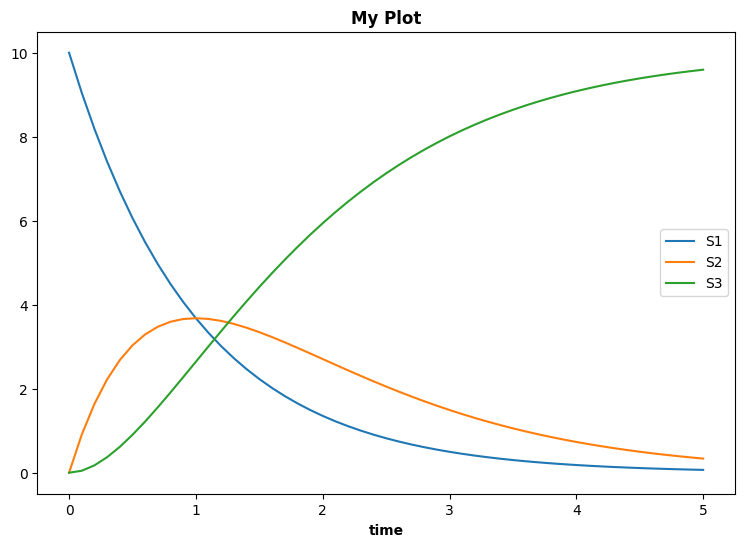

In [5]:
SimpleSEDML.executeSEDML(sedml_str)

## BioModels model

In [6]:
WOLF_URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL3352181362/3/BIOMD0000000206_url.xml"

**Model saved to /Users/jlheller/home/Technical/repos/SimpleSEDML/examples/time_course_model


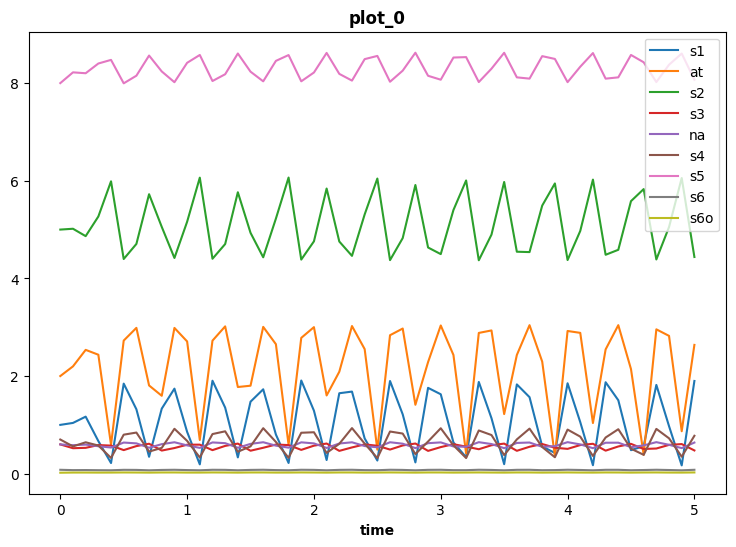

In [7]:
sedml_str = SimpleSEDML.makeSingleModelTimeCourse(WOLF_URL)
SimpleSEDML.executeSEDML(sedml_str)

In [8]:
SimpleSEDML.getModelInformation(WOLF_URL)

**Model saved to /Users/jlheller/home/Technical/repos/SimpleSEDML/examples/task1


/Users/jlheller/home/Technical/repos/SimpleSEDML/src/model.py:79: UserWarning:

*** File {model_source_path} already exists and will be used as model source.
  Use is_overwrite=True to overwrite.



{'model_id': 'task1',
 'parameters': ['k0',
  'k1',
  'k2',
  'k31',
  'k33',
  'k32',
  'k34',
  'k4',
  'k5',
  'k6',
  'k7',
  'k8',
  'k9',
  'k10',
  'atot',
  'ntot',
  'n',
  'ki'],
 'floating_species': ['s1', 'at', 's2', 's3', 'na', 's4', 's5', 's6', 's6o']}

**Model saved to /Users/jlheller/home/Technical/repos/SimpleSEDML/examples/time_course_model


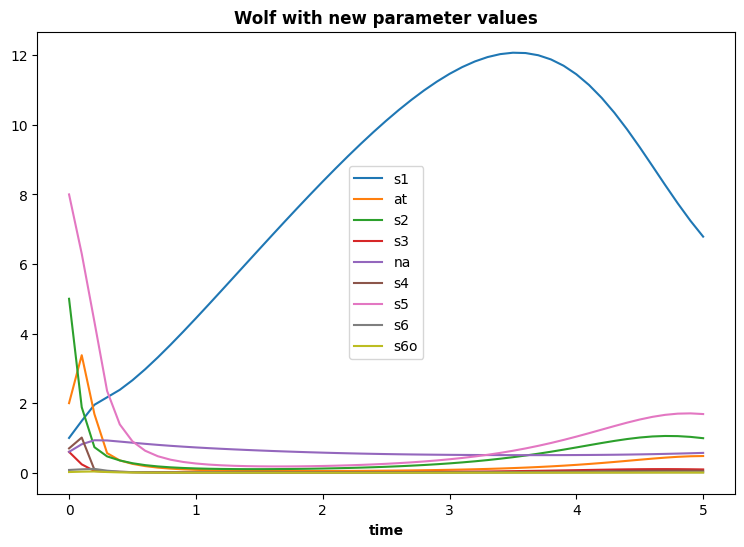

In [21]:
sedml_str = SimpleSEDML.makeSingleModelTimeCourse(WOLF_URL, k0=5, k1=3, title="Wolf with new parameter values")
SimpleSEDML.executeSEDML(sedml_str)

# Use Case 2: Single model with non-default arguments

# Use Case 3: Comparing two time course simulations

# Use Case 4: Compare several parameters at steady state for a single model

# Use Case 5: Compare stochastic simulations

# Use Case 3: Get data for several different simulations

In [9]:
# Compose an experiment
ssed = SimpleSEDML()
ssed.addModel("model1", MODEL_ANT, k1=3, ref_type="ant_str", is_overwrite=True)
ssed.addSimulation("sim1", "uniform", start=0, end=1, num_step=50)
ssed.addTask("task1", "model1", "sim1")
ssed.addReport("time", "S1", "S2", "S3")
ssed.addPlot("time", "S2", title="my plot")

**Model saved to /Users/jlheller/home/Technical/repos/SimpleSEDML/examples/model1


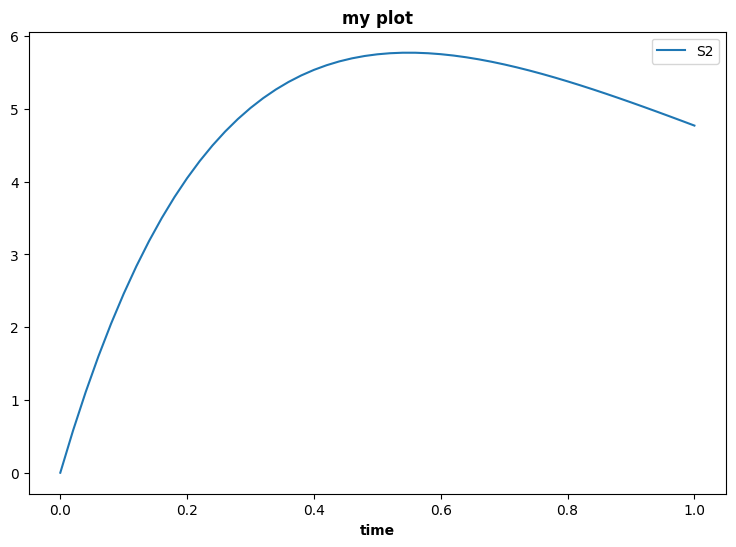

In [10]:
# Run the descript
df = ssed.execute()

In [11]:
df.head(10)

,time,S1,S2,S3
0,0.00,10.000000,0.000000,0.000000
1,0.02,9.417645,0.576512,0.005843
2,0.04,8.869204,1.108035,0.022761
3,0.06,8.352702,1.597415,0.049883
4,0.08,7.866278,2.047328,0.086394
5,0.10,7.408182,2.460289,0.131530
6,0.12,6.976762,2.838663,0.184575
7,0.14,6.570467,3.184674,0.244860
8,0.16,6.187832,3.500409,0.311759
9,0.18,5.827481,3.787832,0.384687


In [12]:
ssed.getModelInfo()

[{'model_id': 'model1',
  'parameters': ['k1', 'k2'],
  'floating_species': ['S1', 'S2', 'S3']}]

# Repeated Tasks

At present, the Tellurium execution of SED-ML only provides access to the last report for repeated tasks.

In [13]:
# Make DataFrame of changes to model parameters
parameter_df = pd.DataFrame(dict(k1=[1, 3], k2=[1, 3]))

**Model saved to /Users/jlheller/home/Technical/repos/SimpleSEDML/examples/model1


/Users/jlheller/home/Technical/repos/SimpleSEDML/src/simple_sedml_base.py:259: UserWarning:

Reports only generate data for the last repeated task.



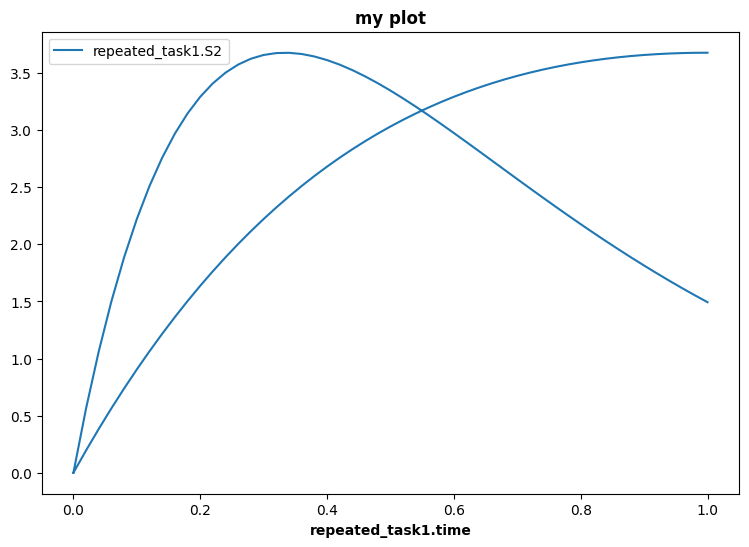

In [14]:
ssed = SimpleSEDML()
ssed.addModel("model1", MODEL_ANT, k1=3, ref_type="ant_str", is_overwrite=True)
ssed.addSimulation("sim1", "uniform", start=0, end=1, num_step=50)
ssed.addTask("task1", "model1", "sim1")
ssed.addRepeatedTask("repeated_task1", "task1", parameter_df=parameter_df)
ssed.addReport("task1.time", "task1.S1", "task1.S2", "task1.S3")
ssed.addPlot("repeated_task1.time", "repeated_task1.S2", title="my plot")
result_df = ssed.execute()

In [15]:
print(ssed.getSEDML())

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.3.0 with libSBML version 5.19.5. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" xmlns:sbml="http://www.sbml.org/sbml/level3/version2/core" level="1" version="4">
  <listOfModels>
    <model id="model1" language="urn:sedml:language:sbml.level-3.version-2" source="/Users/jlheller/home/Technical/repos/SimpleSEDML/examples/model1">
      <listOfChanges>
        <changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='k1']/@value" newValue="3"/>
      </listOfChanges>
    </model>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="1" numberOfSteps="50">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" modelReference="model1" simulationReference="sim1"/>
    <repeatedTask id="repeated_task1" range="vector_for_

# Model is URL

In [16]:
MODEL_URL = "https://www.ebi.ac.uk/biomodels/services/download/get-files/MODEL3352181362/3/BIOMD0000000206_url.xml"
MODEL_ID = "Wolf2000_Glycolytic_Oscillations"

**Model saved to /Users/jlheller/home/Technical/repos/SimpleSEDML/examples/Wolf2000_Glycolytic_Oscillations


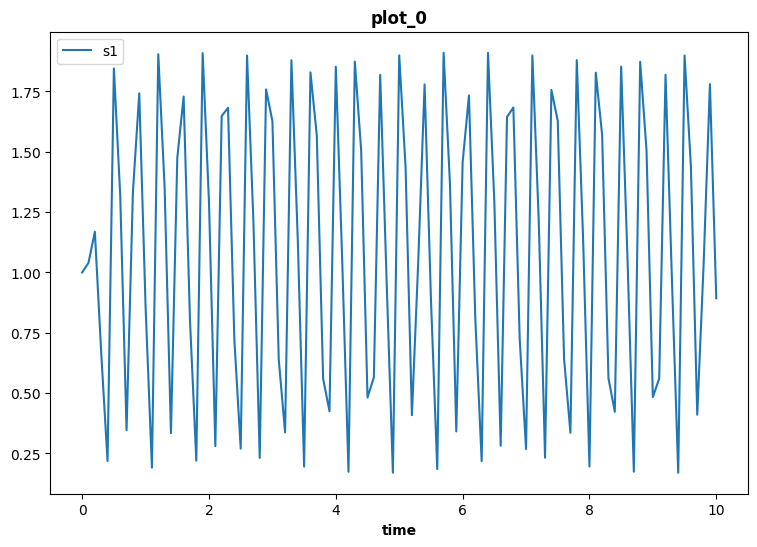

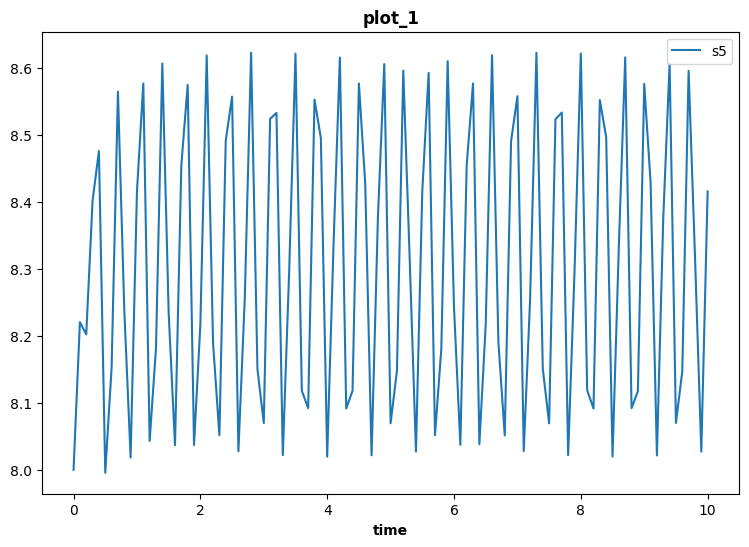

In [17]:
ssed = SimpleSEDML()
ssed.addModel(MODEL_ID, MODEL_URL, ref_type="sbml_url", is_overwrite=True)
ssed.addSimulation("sim1", "uniform", start=0, end=10, num_step=100)
ssed.addTask("task1", MODEL_ID, "sim1")
ssed.addPlot("time", "s1")
ssed.addPlot("time", "s5")
_ = ssed.execute()

In [18]:
print(ssed.getSEDML())

<?xml version="1.0" encoding="UTF-8"?>
<!-- Created by phraSED-ML version v1.3.0 with libSBML version 5.19.5. -->
<sedML xmlns="http://sed-ml.org/sed-ml/level1/version4" xmlns:sbml="http://www.sbml.org/sbml/level2/version3" xmlns:layout="http://projects.eml.org/bcb/sbml/level2" xmlns:render="http://projects.eml.org/bcb/sbml/render/level2" level="1" version="4">
  <listOfModels>
    <model id="Wolf2000_Glycolytic_Oscillations" language="urn:sedml:language:sbml.level-2.version-3" source="/Users/jlheller/home/Technical/repos/SimpleSEDML/examples/Wolf2000_Glycolytic_Oscillations"/>
  </listOfModels>
  <listOfSimulations>
    <uniformTimeCourse id="sim1" initialTime="0" outputStartTime="0" outputEndTime="10" numberOfSteps="100">
      <algorithm name="CVODE" kisaoID="KISAO:0000019"/>
    </uniformTimeCourse>
  </listOfSimulations>
  <listOfTasks>
    <task id="task1" modelReference="Wolf2000_Glycolytic_Oscillations" simulationReference="sim1"/>
  </listOfTasks>
  <listOfDataGenerators>
    

# Cleanup

In [19]:
import os
for ffile in ["model1", "myModel"]:
    if os.path.isfile(ffile):
        os.remove(ffile)